In [175]:
import numpy
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import texplot

# Complexity (FLOPs)

In [73]:
def complexity_gen(n, b):
    """
    For generic matrix.
    
    c: counts
    x: complexities
    """

    # Block size
    m = n / float(b)

    # Matrix decomposiiton
    c1 = b
    x1 = (1.0/3.0) * m**3 - (1.0/2.0) * m**2 + (1.0/6.0) * m

    # Solve linear system
    c2 = b**2 - b
    x2 = (1.0/2.0) * m**3 - (1.0/2.0) * m**2

    # Matrix multiplication
    c3 = (1.0/3.0) * b**3 - (1.0/2.0) * b**2 + (1.0/6.0) * b
    x3 = m**3

    # All
    c = numpy.array([c1, c2, c3])
    x = numpy.array([x1, x2, x3])

    flops = numpy.dot(c, x)

    return flops, c, x

def complexity_sym(n, b):
    """
    For symmetric (positive-definite) matrix.
    
    c: counts
    x: complexities
    """

    # Block size
    m = n / float(b)

    # Matrix decomposiiton
    c1 = b
    x1 = (1.0/6.0) * m**3 - (1.0/4.0) * m**2 + (1.0/12.0) * m

    # Solve linear system
    c2 = (1.0/2.0) * b**2 - (1.0/2.0)*b
    x2 = (1.0/2.0) * m**3 - (1.0/2.0) * m**2

    # Matrix multiplication
    c3 = (1.0/6.0) * b**3 - (1.0/2.0) * b**2 + (1.0/3.0) * b
    x3 = m**3

    c4 = (1.0/2.0) * b**2 - (1.0/2.0) * b
    x4 = (1.0/2.0) * m**3

    # All
    c = numpy.array([c1, c2, c3, c4])
    x = numpy.array([x1, x2, x3, x4])

    flops = numpy.dot(c, x)

    return flops, c, x

In [270]:
def data_for_plot_complexity():
    
    n = 1e3
    # b = numpy.arange(1, n+1)
    # b = numpy.linspace(1, 20, 100)
    b = numpy.logspace(0, numpy.log10(n), 100)
    
    flops_gen_0 = numpy.empty(b.shape)
    flops_gen_1 = numpy.empty(b.shape)
    flops_gen_2 = numpy.empty(b.shape)
    flops_gen_tot = numpy.empty(b.shape)
    
    flops_sym_0 = numpy.empty(b.shape)
    flops_sym_1 = numpy.empty(b.shape)
    flops_sym_2 = numpy.empty(b.shape)
    flops_sym_tot = numpy.empty(b.shape)
    
    for i in range(b.size):
        flops_gen, c_gen, x_gen = complexity_gen(n, b[i])
        flops_sym, c_sym, x_sym = complexity_sym(n, b[i])
    
        # print(f'{flops_:>+4.2e}, c: {c_[0]:>+5.2f}, {c_[1]:>+5.2f}, {c_[2]:>+5.2f}, ' +
        #       f'x: {x_[0]:>+5.2e}, {x_[1]:>+5.2e}, {c_[2]:>+5.2e}')
    
        flops_gen_0[i] = c_gen[0] * x_gen[0]
        flops_gen_1[i] = c_gen[1] * x_gen[1]
        flops_gen_2[i] = c_gen[2] * x_gen[2]
        flops_gen_tot[i] = flops_gen_0[i] + flops_gen_1[i] + flops_gen_2[i]
    
        flops_sym_0[i] = c_sym[0] * x_sym[0]
        flops_sym_1[i] = c_sym[1] * x_sym[1]
        flops_sym_2[i] = c_sym[2] * x_sym[2] + c_sym[3] * x_sym[3]
        flops_sym_tot[i] = flops_sym_0[i] + flops_sym_1[i] + flops_sym_2[i]

    data = {
        'n': n,
        'b': b,
        'flops_gen_0': flops_gen_0,
        'flops_gen_1': flops_gen_1,
        'flops_gen_2': flops_gen_2,
        'flops_gen_tot': flops_gen_tot,
        'flops_sym_0': flops_sym_0,
        'flops_sym_1': flops_sym_1,
        'flops_sym_2': flops_sym_2,
        'flops_sym_tot': flops_sym_tot,
    }

    return data

In [364]:
def plot_complexity(ax):
    
    linestyle_gen = '-'
    linestyle_sym = '--'
    marker = None

    # decomp_color = 'olivedrab'
    # solve_color = 'darkgoldenrod'
    # matmul_color = 'firebrick'
    # total_color = 'black'

    decomp_color = 'forestgreen'
    solve_color = 'goldenrod'
    matmul_color = 'firebrick'
    total_color = 'black'

    data = data_for_plot_complexity()
    n = data['n']
    b = data['b']
    
    x = b
    g0, = ax.plot(x, data['flops_gen_0'] / n**3, linestyle=linestyle_gen, marker=marker, color=decomp_color, label='Matrix Decomposition')
    g1, = ax.plot(x, data['flops_gen_1'] / n**3, linestyle=linestyle_gen, marker=marker, color=solve_color, label='Solve Triangular System')
    g2, = ax.plot(x, data['flops_gen_2'] / n**3, linestyle=linestyle_gen, marker=marker, color=matmul_color, label='Matrix Multiplication')
    g3, = ax.plot(x, data['flops_gen_tot'] / n**3, linestyle=linestyle_gen, marker=marker, color=total_color, label='Total')

    s0, = ax.plot(x, data['flops_sym_0'] / n**3, linestyle=linestyle_sym, marker=marker, color=decomp_color, label='Matrix Decomposition')
    s1, = ax.plot(x, data['flops_sym_1'] / n**3, linestyle=linestyle_sym, marker=marker, color=solve_color, label='Solve Triangular System')
    s2, = ax.plot(x, data['flops_sym_2'] / n**3, linestyle=linestyle_sym, marker=marker, color=matmul_color, label='Matrix Multiplication')
    s3, = ax.plot(x, data['flops_sym_tot'] / n**3, linestyle=linestyle_sym, marker=marker, color=total_color, label='Total')


    extra = Rectangle((0, 0), 1, 1, fc="w", fill=False, edgecolor='none', linewidth=0)
    handles,labels = ax.get_legend_handles_labels()

    handles = [
        extra, extra, extra, extra, extra,
        extra, g0, g1, g2, g3,
        extra, s0, s1, s2, s3,
    ]

    labels = [
        "", "Matrix Decomposition", "Solve Triangular Sys.", "Matrix Multiplication", "Total",
        r"\textbf{Generic}", "", "", "", "",
        r"\textbf{Symmetric}", "", "", "", ""
    ]

    # bbox_to_anchor=(1.02, 1.025)
    lg = ax.legend(handles, labels, bbox_to_anchor=(0.355, 0.838), loc='upper left', ncol=3, handletextpad = -2.85,
      columnspacing=1.2, markerscale=1.5, borderpad=0.8, handlelength=2.7, fontsize='x-small')
    lg.get_frame().set_alpha(None)
    lg.get_frame().set_facecolor((0, 0, 0, 0.0))
    
    # ax.legend(fontsize='small')
    ax.set_xlabel(r'$n_b$')
    ax.set_ylabel(r'FLOPs / $n^3$')
    ticks = [0, 1/6, 1/3]
    labels = [r'$0$', r'$\frac{1}{6}$', r'$\frac{1}{3}$']
    ax.set_yticks(ticks)
    ax.set_yticklabels(labels)
    ax.set_title('(a) Complexity per Algebraic Operation')
    ax.set_xscale('log')

    # Custom ticks (not in exponential format)
    custom_ticks = [1, 2]
    ticks = ax.get_xticks()
    ticks = numpy.unique(numpy.append(ticks, custom_ticks))
    ax.set_xticks(ticks)
    labels = [
        f"{int(t):d}" if t in custom_ticks else (
            fr"$n=10^{{{int(numpy.log10(t))}}}$" if t == n else f"$10^{{{int(numpy.log10(t))}}}$"
        )
        for t in ticks
    ]
    ax.set_xticklabels(labels)

    ax.set_xlim([x[0], x[-1]])
    ax.set_ylim(bottom=0)

# Data Transfer

In [302]:
def data_transfer_gen(n, b):
    """
    For generic matrix.
    
    r: read
    w: write
    """

    # Block size
    m = n / float(b)

    r = (2.0/3.0) * b**3 - b**2 + (4.0/3.0) * b

    if b <= 2:
        w = 0
    else:
        w = (1.0/3.0) * b**3 - (4.0/3.0) * b - 1

    # Total size is count of data transfer times block size
    r = r * (m**2)
    w = w * (m**2)

    return r, w

def data_transfer_sym(n, b):
    """
    For symmetric matrix.
    
    r: read
    w: write
    """

    # Block size
    m = n / float(b)

    r = (1.0/3.0) * b**3 - (1.0/2.0) * b**2 + (7.0/6.0) * b

    if b <= 2:
        w = 0
    else:
        w = (1.0/6.0) * b**3 + (1.0/2.0) * b**2 - (11.0/3.0) * b + 4

    # Total size is count of data transfer times block size
    r = (r - b) * (m**2) + b * (1.0/2.0) * m**2
    w = w * (m**2)

    return r, w

In [303]:
def data_for_plot_data_transfer():

    n = 1e5
    # b = numpy.arange(1, 10).astype(numpy.float64)
    # b = numpy.linspace(1, 20, 100)
    # b = numpy.logspace(0, numpy.log10(n), 100)
    b = numpy.r_[1, 2, 3, 3.5, numpy.logspace(2, 4, 100, base=2)]
    
    read_gen = numpy.empty(b.shape)
    write_gen = numpy.empty(b.shape)
    
    read_sym = numpy.empty(b.shape)
    write_sym = numpy.empty(b.shape)
    
    for i in range(b.size):
        read_gen[i], write_gen[i] = data_transfer_gen(n, b[i])
        read_sym[i], write_sym[i] = data_transfer_sym(n, b[i])
    
        # print(f'{read_gen[i]:>5.2e}, {write_gen[i]:>5.2e}, {read_sym[i]:>5.2e}, {write_sym[i]:>5.2e}')

    data = {
        'n': n,
        'b': b,
        'read_gen': read_gen,
        'write_gen': write_gen,
        'read_sym': read_sym,
        'write_sym': write_sym,
    }

    return data

In [340]:
def plot_data_transfer(ax):
    
    linestyle_gen = '-'
    linestyle_sym = '--'
    marker = None

    read_color = 'darkblue'
    write_color = 'darkgoldenrod'

    data = data_for_plot_data_transfer()
    n = data['n']
    b = data['b']
    
    x = b
    g0, = ax.plot(x, data['read_gen'] / n**2, linestyle=linestyle_gen, marker=marker, color=read_color, label='Read')
    g1, = ax.plot(x, data['write_gen'] / n**2, linestyle=linestyle_gen, marker=marker, color=write_color, label='Write')

    s0, = ax.plot(x, data['read_sym'] / n**2, linestyle=linestyle_sym, marker=marker, color=read_color, label='Read')
    s1, = ax.plot(x, data['write_sym'] / n**2, linestyle=linestyle_sym, marker=marker, color=write_color, label='Write')


    extra = Rectangle((0, 0), 1, 1, fc="w", fill=False, edgecolor='none', linewidth=0)
    handles,labels = ax.get_legend_handles_labels()

    handles = [
        extra, extra, extra,
        extra, g0, g1,
        extra, s0, s1,
    ]

    labels = [
        "", "Read", "Write",
        r"\textbf{Generic}", "", "",
        r"\textbf{Symmetric}", "", "",
    ]

    # bbox_to_anchor=(1.02, 1.025)
    lg = ax.legend(handles, labels, loc='upper left', ncol=3, handletextpad = -2.85,
      columnspacing=1.2, markerscale=1.5, borderpad=0.8, handlelength=2.7, fontsize='x-small')
    lg.get_frame().set_alpha(None)
    lg.get_frame().set_facecolor((0, 0, 0, 0.0))
    
    # ax.legend(fontsize='small')
    ax.set_xlabel(r'$n_b$')
    ax.set_ylabel(r'Size (bytes) / $(n^2 \beta)$')
    y_ticks = [0, 0.5, 1, 2, 4, 8]
    y_labels = ['0', r'$\sfrac{1}{2}$', '1', '2', r'$2^2$', r'$2^3$']
    ax.set_yticks(y_ticks)
    ax.set_yticklabels(y_labels)
    ax.set_title('(b) Data Transfer')
    # ax.set_xscale('log', base=2)
    # ax.set_yscale('log', base=2)

    # Custom ticks (not in exponential format)
    custom_ticks = [1, 2]
    ticks = [1, 2, 4, 8, 16]
    ticks = numpy.unique(numpy.append(ticks, custom_ticks))
    ticks = ticks[ticks > 0]
    ax.set_xticks(ticks)
    labels = [
        f"{int(t):d}" if t in custom_ticks else (
            fr"$n=2^{{{int(numpy.log2(t))}}}$" if t == n else f"$2^{{{int(numpy.log2(t))}}}$"
        )
        for t in ticks
    ]
    ax.set_xticklabels(labels)

    ax.set_xlim([x[0], x[-1]])
    ax.set_ylim([0, 8])

# Plot All

Plot saved to "/home/sia/work/github/detkit/notebooks/analytical_performance.svg".
Plot saved to "/home/sia/work/github/detkit/notebooks/analytical_performance.pdf".


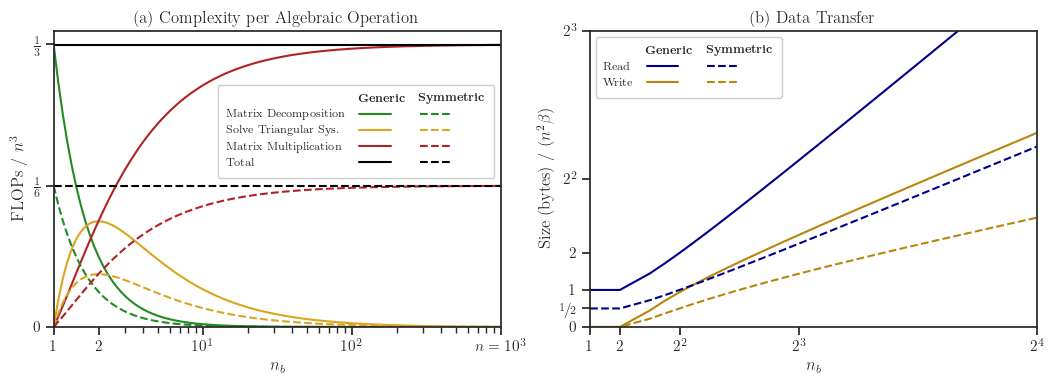

In [369]:
with texplot.theme(rc={'font.family': 'serif'}):

    plt.rcParams['text.latex.preamble'] = r'\usepackage{amsmath} \usepackage{xfrac}'

    fig, ax = plt.subplots(figsize=(10.7, 4), ncols=2)

    plot_complexity(ax[0])
    plot_data_transfer(ax[1])

    plt.tight_layout()
    fig.subplots_adjust(wspace=0.2)

    texplot.show_or_save_plot(plt, default_filename='analytical_performance',
                              transparent_background=True, dpi=200,
                              show_and_save=True, verbose=True)